### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### The data

In [2]:
data = pd.read_csv('C:/Users/irem/Desktop/The Data Science Course 2021 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S38_L264/3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

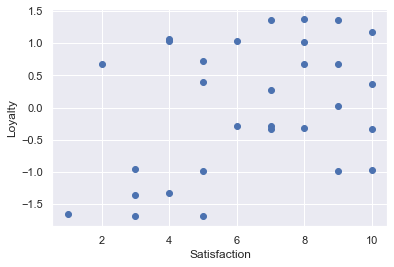

In [3]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [4]:
x = data.copy()

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [6]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

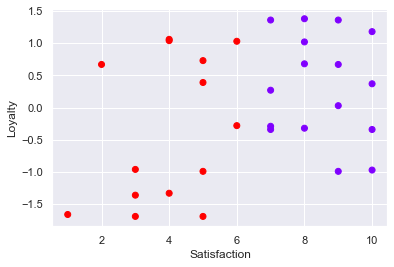

In [7]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Since we have not standardized the 'Satisfaction' feature, the algorithm creates clusters mainly related to this feature.

### Standardizing the features

In [9]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Elbow method

In [10]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.495643645043642,
 4.380320178840312,
 3.752355196324646]

Text(0, 0.5, 'WCSS')

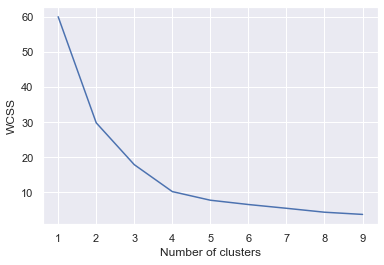

In [11]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The elbow method is mostly useful, but there are cases similar to above where we are not certain that which one gives the best solution, since there are peak points in the graph in 2, 3, 4, and 5 clusters solutions.

### Solutions comparisons

In [23]:
kmeans_new = KMeans(9)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [24]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,3
1,6,-0.28,2
2,5,-0.99,3
3,7,-0.29,2
4,4,1.06,4
5,1,-1.66,1
6,10,-0.97,5
7,8,-0.32,2
8,8,1.02,7
9,8,0.68,7


Note that the data contains the original values, but the clusters are resulted based on standardized data.

Text(0, 0.5, 'Loyalty')

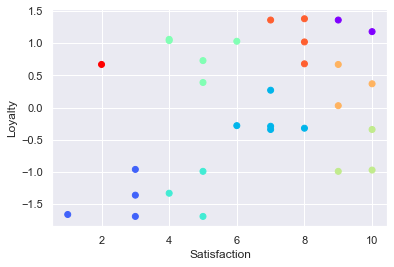

In [25]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')